**<font size="5">В файле есть картинки с решениями и заданиями, но онлайн просмотрщик на гитхабе их не отображает. Необходимо склонировать репозиторий.</font>**

In [1]:
import numpy as np

**Задания к уроку №6**
1. **Решите линейную систему**:  
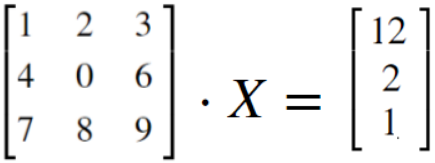


In [2]:
M_6_1 = np.array([[1,2,3],[4,0,6],[7,8,9]])
B = np.array([12,2,1])

In [3]:
solve_1 = np.linalg.solve(M_6_1, B)
solve_1

array([-9.2       ,  0.9       ,  6.46666667])

In [4]:
M_6_1_inv = np.linalg.inv(M_6_1)
M_6_1_inv

array([[-0.8       ,  0.1       ,  0.2       ],
       [ 0.1       , -0.2       ,  0.1       ],
       [ 0.53333333,  0.1       , -0.13333333]])

In [5]:
solve_2 = np.dot(M_6_1_inv, B)
solve_2

array([-9.2       ,  0.9       ,  6.46666667])

In [6]:
M_6_1 @ solve_1

array([12.,  2.,  1.])

In [7]:
M_6_1 @ solve_2

array([12.,  2.,  1.])

2. **Найдите псевдорешение**:  
<font size="5">x + 2y – z = 1  
3x – 4y = 7  
8x – 5y + 2z = 12  
2x – 5z = 7  
11x +4y – 7z = 15</font>  


In [8]:
A = np.array([[1,2,-1],[3,-4,0],[8,-5,2],[2,0,-5],[11,4,-7]])
B = np.array([1,7,12,7,15])

In [9]:
xyz_answer = np.linalg.lstsq(A,B, rcond=None)
xyz_answer

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [10]:
def Q(x, y, z):
    return ((np.linalg.norm(np.dot(A, [x, y, z]) - B))**2)

In [11]:
Q(*xyz_answer[0])

0.7152321111819713

3. **Сколько решений имеет линейная система**:
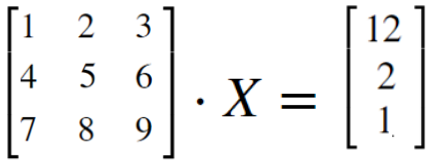  
Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.

In [12]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[12,2,1]])

In [13]:
C = np.concatenate((A,B.T), axis=1)
C

array([[ 1,  2,  3, 12],
       [ 4,  5,  6,  2],
       [ 7,  8,  9,  1]])

In [14]:
np.linalg.matrix_rank(A), np.linalg.matrix_rank(C)

(2, 3)

**В данный момент система имеет ноль решений, так как она несовместна.**  
Изменим 'B' так чтобы ранг основной и расширенной матрицы стали равны количеству неизвестных:

In [15]:
B = np.array([[2,2,2]])
C = np.concatenate((A,B.T), axis=1)
print(C)
np.linalg.matrix_rank(A), np.linalg.matrix_rank(C)

[[1 2 3 2]
 [4 5 6 2]
 [7 8 9 2]]


(2, 2)

**Получившаяся совместная СЛАУ имеет бесконечное множество решений, так как ранг меньше числа неизвестных.**

4. **Вычислите LU-разложение матрицы**:
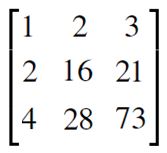  
После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.  

In [16]:
A = np.array([[1,2,3],[2,16,21],[4,28,73]])
A

array([[ 1,  2,  3],
       [ 2, 16, 21],
       [ 4, 28, 73]])

In [17]:
import scipy.linalg

In [18]:
P, L, U = scipy.linalg.lu(A)

In [19]:
P

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [20]:
L

array([[ 1.  ,  0.  ,  0.  ],
       [ 0.25,  1.  ,  0.  ],
       [ 0.5 , -0.4 ,  1.  ]])

In [21]:
U

array([[  4.  ,  28.  ,  73.  ],
       [  0.  ,  -5.  , -15.25],
       [  0.  ,   0.  , -21.6 ]])

In [22]:
B = np.array([3,12,48])
B

array([ 3, 12, 48])

In [23]:
np.linalg.solve(A, B)

array([ 1.63888889, -0.40277778,  0.72222222])

In [24]:
np.dot(P, A)

array([[ 2., 16., 21.],
       [ 4., 28., 73.],
       [ 1.,  2.,  3.]])

In [25]:
A2 = np.dot(L, U)
A2

array([[ 4., 28., 73.],
       [ 1.,  2.,  3.],
       [ 2., 16., 21.]])

In [26]:
np.linalg.solve(A2, B)

array([ 9.18055556,  4.95138889, -2.36111111])

5. **Найдите нормальное псевдорешение недоопределенной системы**:  
<font size="5">x + 2y – z = 1  
8x – 5y + 2z = 12</font>  
Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.


In [27]:
A = np.array([[1,2,-1],[8,-5,2]])
A

array([[ 1,  2, -1],
       [ 8, -5,  2]])

In [28]:
B = np.array([1,12])
B

array([ 1, 12])

In [29]:
def Q(x,y,z):
    return (x**2 + y**2 + z**2)

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

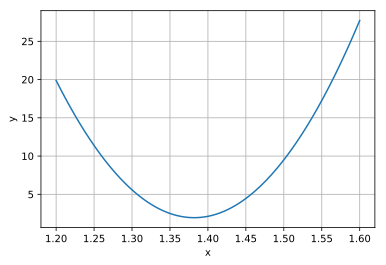

In [31]:
x = np.linspace(-1, 4, 301)
x = np.linspace(1.2, 1.6, 301)
plt.plot(x, Q(x, 10*x - 14, 6 - 4*x + 2.5 * (10 * x - 14)))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [32]:
solve_answer = np.linalg.lstsq(A, B, rcond=None)
solve_answer

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

In [33]:
np.dot(A, solve_answer[0])

array([ 1., 12.])

6. **Найдите одно из псевдорешений вырожденной системы**:  
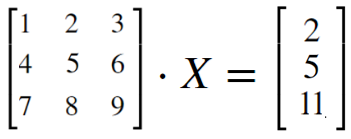  
Попробуйте также отыскать и нормальное псевдорешение.

In [34]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([2,5,1])
print("A:", A, sep="\n")
print("B:", B, sep="\n")

A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
B:
[2 5 1]


In [35]:
Q, R = np.linalg.qr(A)
print("Q:", Q, sep="\n")
print("R:", R, sep="\n")

Q:
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
R:
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]


In [36]:
np.dot(Q, R)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [37]:
R1 = R[:2, :2]
print("R1:", R1, sep="\n")

R1:
[[-8.1240384  -9.6011363 ]
 [ 0.          0.90453403]]


In [38]:
B1 = np.dot(Q.T, B)[:2]
print("B1:", B1, sep="\n")

B1:
[-3.56965324  3.01511345]


In [39]:
X1 = np.linalg.solve(R1, B1)
print("X1:", X1, sep="\n")

X1:
[-3.5         3.33333333]


In [40]:
X = np.append(X1, 0)
print("X:", X, sep="\n")

X:
[-3.5         3.33333333  0.        ]


In [41]:
np.linalg.norm(X)

4.833333333333305

In [42]:
np.linalg.norm(np.dot(A, X) - B)

2.857738033247041

In [43]:
lstsq_answer = np.linalg.lstsq(A, B, rcond=None)
lstsq_answer

(array([-1.80555556, -0.05555556,  1.69444444]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))

In [44]:
np.linalg.norm(lstsq_answer[0]), np.linalg.norm(np.dot(A, lstsq_answer[0]) - B)

(2.4767436805731915, 2.8577380332470415)